In [2]:
import json
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML, Image 

Setting                                                                                                             Value
0           additional_parameters                                          --lr_scheduler_type "CosineAnnealingLR" --lr_scheduler_args "T_max=1000"
1                     logging_dir                                                                        /home/daniarch/projects/kohya_ss/V3_R4/log
2                   min_snr_gamma                                                                                                                 5
3                   network_alpha                                                                                                                32
4                     network_dim                                                                                                                32
5                       optimizer                                                                                                           Prodigy
6                  optimizer_args           decouple=True weight_decay=0.45 d_coef=2 use_bias_correction=True safeguard_warmup=True betas=0.9,0.99 
7   pretrained_model_name_or_path  /home/daniarch/miniconda3/envs/autoLDM/stable-diffusion-webui/models/Stable-diffusion/sd_xl_base_1.0.safetensors
8                            sdxl                                                                                                              True
9                  train_data_dir                                                                        /home/daniarch/projects/kohya_ss/V3_R4/img
10                      LoRA_type                                                                                                          Standard
11                   lr_scheduler                                                                                                          constant
12                  learning_rate                                                                                                               1.0
13                    keep_tokens                                                                                                                 1
14               training_comment                                                                                                          4 repeat
15               train_batch_size                                                                                                                 4
16                shuffle_caption                                                                                                              True
17                   max_timestep                                                                                                              1000

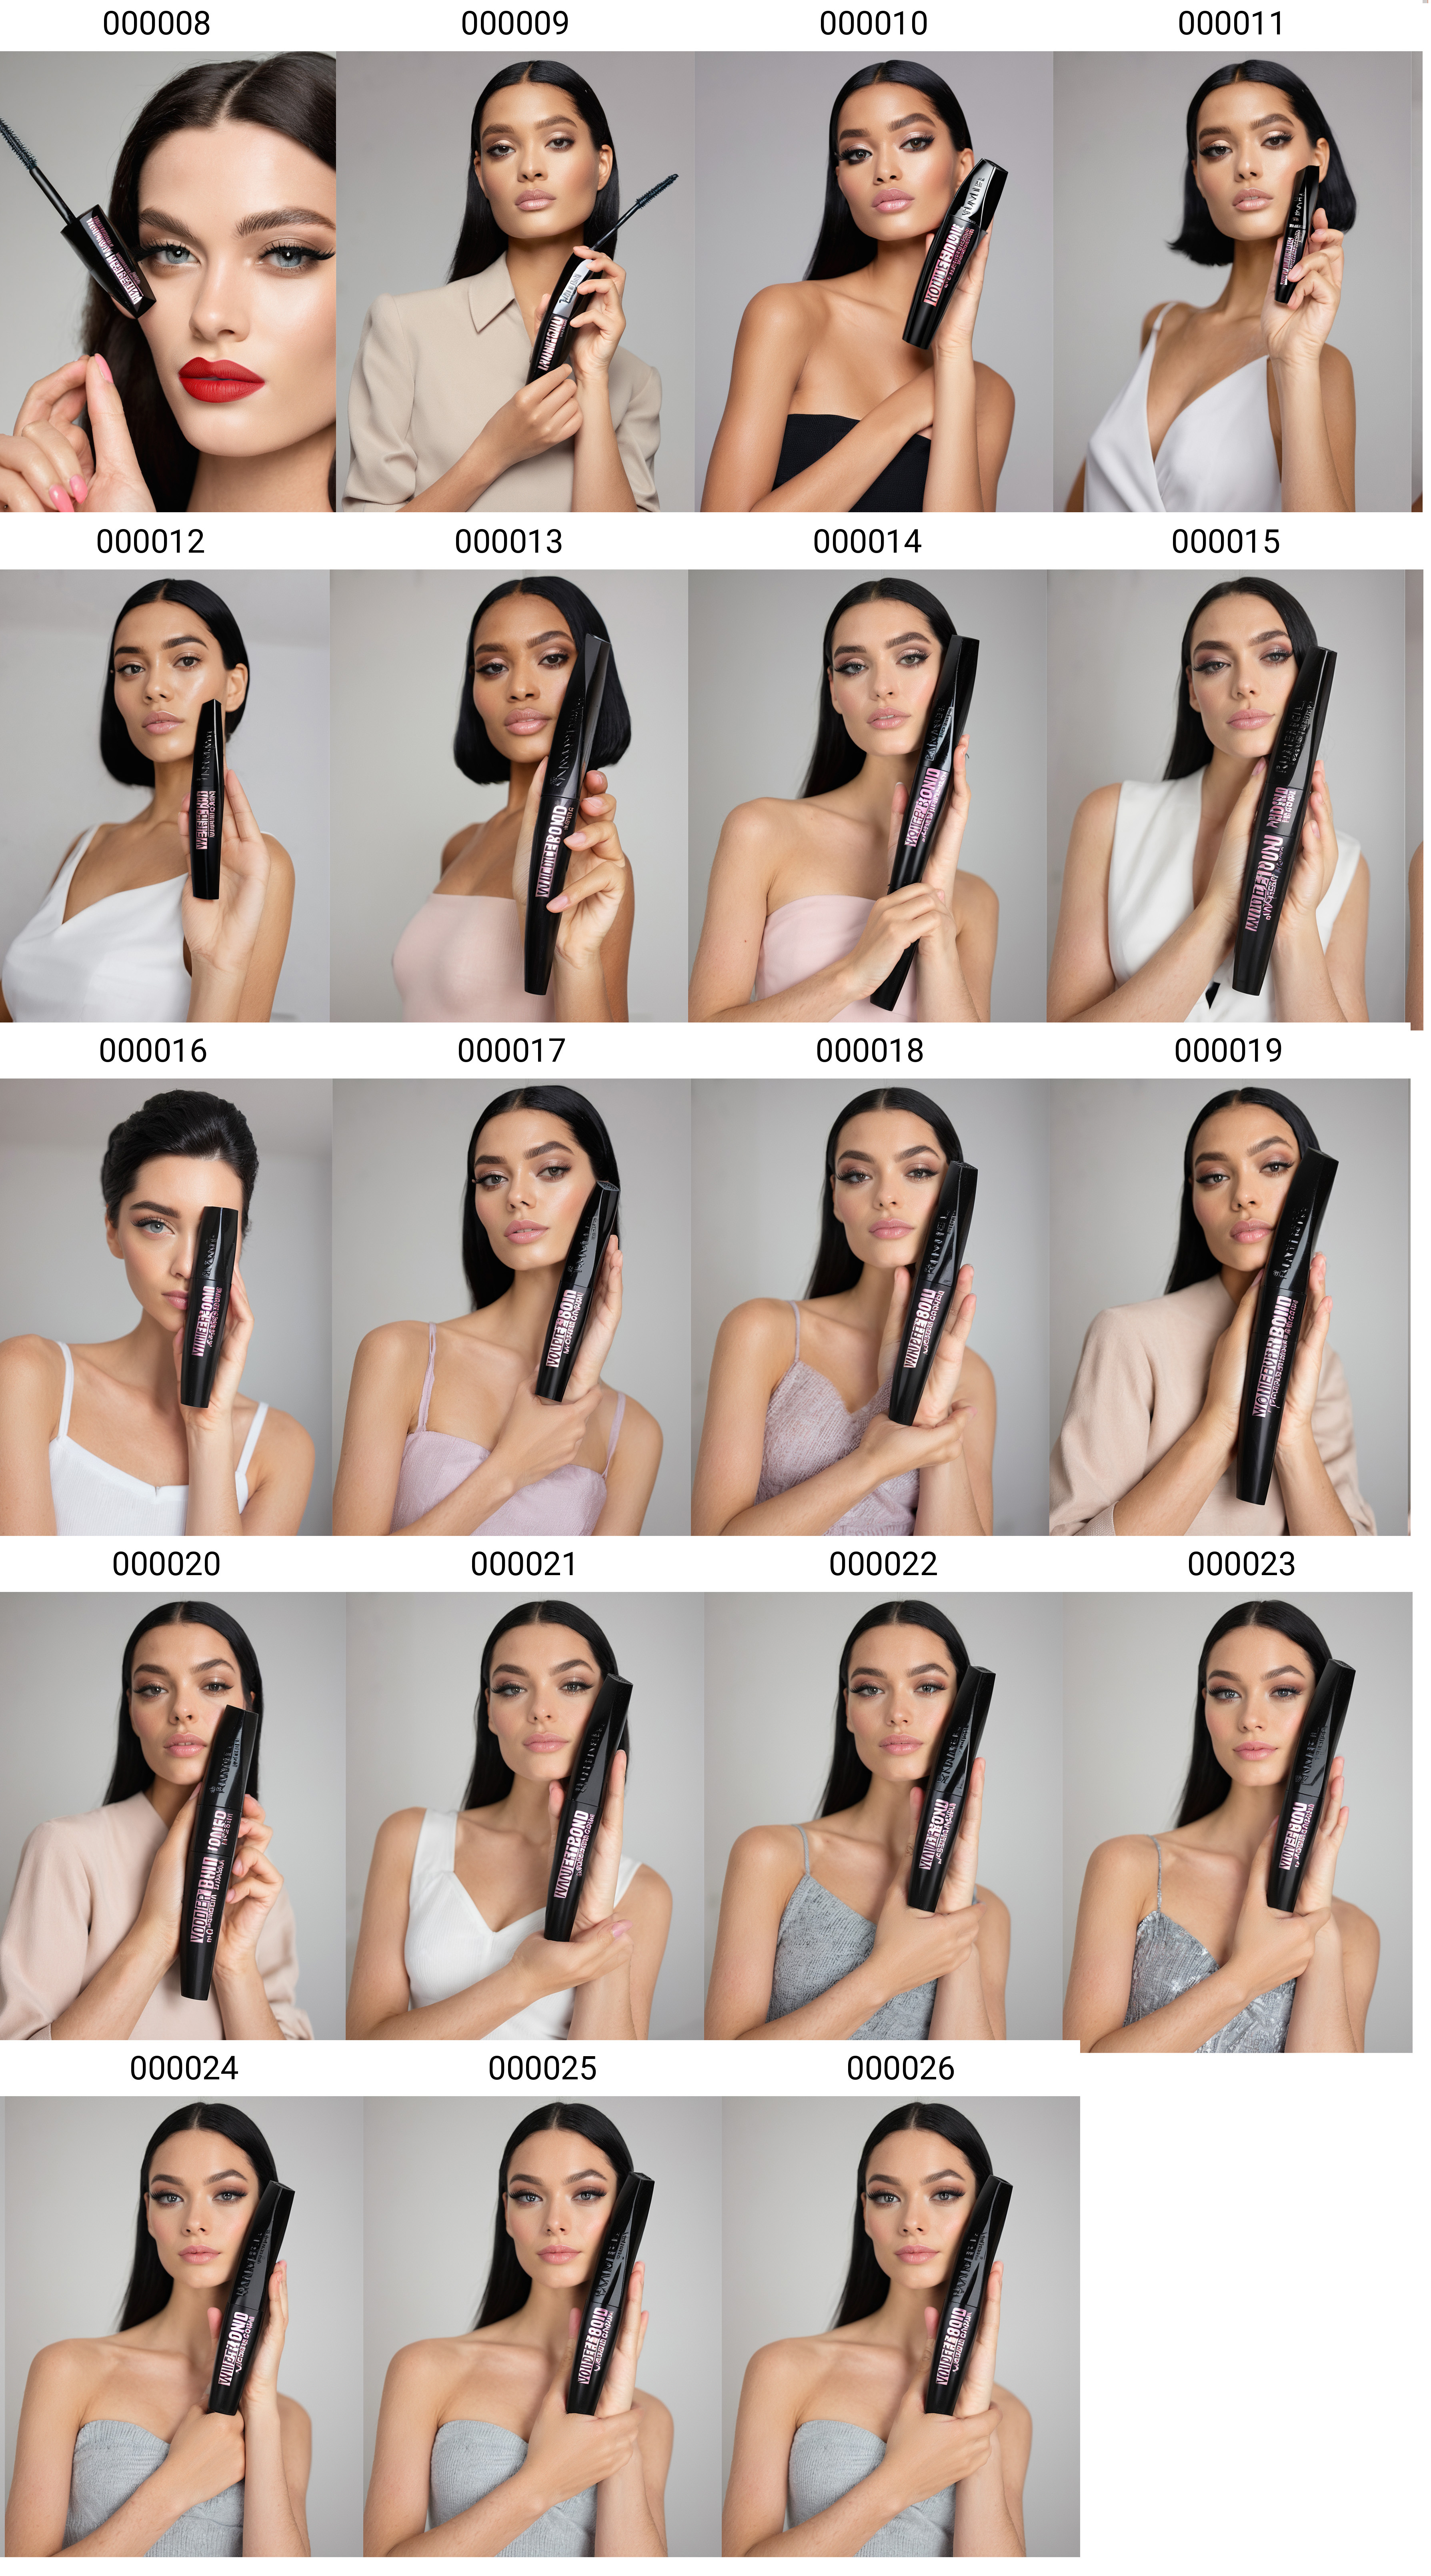

In [3]:
# Load the JSON data into a Python dictionary
json_file_path = '/home/daniarch/projects/kohya_ss_multi_GPU/Note_book/Jobs/rimmel/json/V3_R4_lora_sdxl_prodigy_22_20240119-221944.json' #"Z:\projects\kohya_ss_multi_GPU\Note_book\Jobs\rimmel\json\V3_R4_lora_sdxl_prodigy_22_20240119-221944.json"
with open(json_file_path, 'r') as file:
    settings_json = json.load(file)

# Display the JSON file name with larger font size
file_name = json_file_path.split('/')[-1]
display(HTML(f"<h3 style='font-size: 45px;'>{file_name}</h3>"))

# Truncate the value of 'sample_prompts' to 10 characters
if 'sample_prompts' in settings_json:
    settings_json['sample_prompts'] = settings_json['sample_prompts'][:10]

# Convert to a DataFrame
settings_df = pd.DataFrame(list(settings_json.items()), columns=['Setting', 'Value'])

# Convert index to a column and reset the index
settings_df.reset_index(inplace=True)
settings_df.rename(columns={'index': 'No.'}, inplace=True)

# Splitting the DataFrame into eighths
eighth_len = len(settings_df) // 8
eighths = [settings_df.iloc[i*eighth_len:(i+1)*eighth_len] for i in range(8)]

# Handling the case where the total number of rows is not exactly divisible by 8
if len(settings_df) % 8 != 0:
    eighths[-1] = pd.concat([eighths[-1], settings_df.iloc[8*eighth_len:]])

# Adjusting the display options for a compact view
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 4000)
pd.set_option('display.max_colwidth', None)

# Combining the eight parts side by side
df_display = eighths[0].reset_index(drop=True)
for i in range(1, 8):
    df_display = df_display.join(eighths[i].reset_index(drop=True), rsuffix=f'_{i+1}')

# Apply styling for vertical alignment to the entire DataFrame
styled_df_full_aligned = df_display.style.set_properties(**{'vertical-align': 'top'})

# Display the styled DataFrame
display(styled_df_full_aligned)

# Define the list of important settings
important_keys = [
    'additional_parameters', 'logging_dir', 'min_snr_gamma', 'network_alpha', 
    'network_dim', 'optimizer', 'optimizer_args', 'pretrained_model_name_or_path', 
    'sdxl', 'train_data_dir', 'LoRA_type', 'lr_scheduler', 'learning_rate', 
    'keep_tokens', 'training_comment', 'train_batch_size', 'shuffle_caption', 'max_timestep'
]

# Extract the important settings
important_settings = {k: settings_json.get(k, 'Not available') for k in important_keys}

# Convert to a DataFrame
important_settings_df = pd.DataFrame(list(important_settings.items()), columns=['Setting', 'Value'])

# Display the title for important settings
display(HTML("<h3 style='font-size: 45px;'>Important Settings</h3>"))

# Display the important settings DataFrame
display(important_settings_df)

# Define the image path
image_path = "/home/daniarch/projects/kohya_ss_multi_GPU/Note_book/Jobs/rimmel/images_nb/V3_R4_lora_sdxl_prodigy_22.jpg" #"Z:\projects\kohya_ss_multi_GPU\Note_book\Jobs\rimmel\images_nb\V3_R4_lora_sdxl_prodigy_22.jpg"

# Extracting and displaying the image file name with larger font size
image_file_name = image_path.split('/')[-1]
display(HTML(f"<h3 style='font-size: 45px;'>{image_file_name}</h3>"))

# Display the image
display(Image(image_path))

